In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# [TODO] Add your H1 title heading here

**_NOTE_**: This notebook has been tested in the following environment:

* Python version = 3.10.13

## Overview

{TODO: Include a paragraph or two explaining what this example demonstrates, who should be interested in it, and what you need to know before you get started.}

Learn more about [web-doc-title](linkback-to-webdoc-page). {TODO: if more than one primary feature, add tag/linkback for each one}

### Objective

In this tutorial, you learn how to {TODO: Complete the sentence explaining briefly what you will learn from the notebook, such as
training, hyperparameter tuning, or serving}:

This tutorial uses the following Google Cloud ML services and resources:

- *{TODO: Add high level bullets for the services/resources demonstrated; e.g., Vertex AI Training}*


The steps performed include:

- *{TODO: Add high level bullets for the steps of performed in the notebook}*

### Dataset

{TODO: Include a paragraph with Dataset information and where to obtain it.} 

{TODO: Make sure the dataset is accessible to the public. **Googlers**: Add your dataset to the [public samples bucket](http://goto/cloudsamples#sample-storage-bucket) within gs://cloud-samples-data/vertex-ai, if it doesn't already exist there.}

### Costs 

{TODO: Update the list of billable products that your tutorial uses.}

This tutorial uses billable components of Google Cloud:

* Vertex AI
* {TODO: BigQuery}
* Cloud Storage

{TODO: Include links to pricing documentation for each product you listed above.
 NOTE: If you use BigQuery or Dataflow, you need to add this to the pricing.
}

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing),
{ TODO: [BigQuery pricing](https://cloud.google.com/bigquery/pricing), }
and [Cloud Storage pricing](https://cloud.google.com/storage/pricing), 
and use the [Pricing Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

## Installation

Install the following packages required to execute this notebook. 

{TODO: Suggest using the latest major GA version of each package; i.e., --upgrade}

In [3]:
!pip3 install --upgrade --user google-cloud-aiplatform umap-learn tqdm pypdf

## Before you begin

### Set up your Google Cloud project

**The following steps are required, regardless of your notebook environment.**

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.

2. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).

3. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com). {TODO: Update the APIs needed for your tutorial. Edit the API names, and update the link to append the API IDs, separating each one with a comma. For example, container.googleapis.com,cloudbuild.googleapis.com}

4. If you are running this notebook locally, you need to install the [Cloud SDK](https://cloud.google.com/sdk).

#### Set your project ID

**If you don't know your project ID**, try the following:
* Run `gcloud config list`.
* Run `gcloud projects list`.
* See the support page: [Locate the project ID](https://support.google.com/googleapi/answer/7014113)

In [4]:
PROJECT_ID = "qwiklabs-gcp-03-a94b149fef04"  # @param {type:"string"}

# Set the project id
! gcloud config set project {PROJECT_ID}

Updated property [core/project].


In [5]:
import IPython
from IPython.display import Markdown, display
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

#### Region

You can also change the `REGION` variable used by Vertex AI. Learn more about [Vertex AI regions](https://cloud.google.com/vertex-ai/docs/general/locations).

In [1]:
REGION = "us-central1"  # @param {type: "string"}

In [2]:
PROJECT = !gcloud config get-value project
PROJECT_ID = PROJECT[0]
LOCATION = "us-east4"

In [3]:
from vertexai.preview.generative_models import GenerativeModel
from vertexai.language_models import TextEmbeddingModel
text_embedding_model = TextEmbeddingModel.from_pretrained("text-embedding-004")
model = GenerativeModel('gemini-pro')

### The provided code is a Python script that downloads a PDF file from a specified URL using the urllib library. Here's a breakdown of what each part of the code does:

In [4]:
import urllib.request

# download alphabet's annual pdf report
url = "https://abc.xyz/assets/d4/4f/a48b94d548d0b2fdc029a95e8c63"
file = "2022-alphabet-annual-report.pdf"

urllib.request.urlretrieve(f"{url}/{file}", filename=f"{file}")

('2022-alphabet-annual-report.pdf',
 <http.client.HTTPMessage at 0x7fa90c3c23b0>)

In [5]:
!pip install PyPDF2
import PyPDF2

# Open the PDF file in binary mode
with open('2022-alphabet-annual-report.pdf', 'rb') as file:
    # Create a PdfFileReader object
    pdf_reader = PyPDF2.PdfReader(file)
    pdf_texts = [p.extract_text().strip() for p in pdf_reader.pages]

    # Filter the empty strings
    pdf_texts = [text for text in pdf_texts if text]

    print(pdf_texts[0])

To our investors,
2022 was a year full of change and uncertainty around 
the world. In February, when war broke out in Ukraine, our teams worked around-the-clock to make sure our products were helpful to people who needed them, from providing trustworthy information on Search to disrupting cyberattacks to partnering with the government to deploy air raid alerts. In March, I traveled to Warsaw, Poland, where I met Googlers hosting families who sought refuge, talked with entrepreneurs using our office spaces, and saw how our products like Google Translate were helping Ukrainians find a bit of hope and connection.
By late spring, the tech industry was adjusting to a 
more challenging macroeconomic environment, and as a company we embarked on efforts to sharpen our focus and make sure our efforts are aligned with our highest priorities. Near the end of the year, AI reached an inflection point, made possible by our foundational breakthroughs like Transformer and advances in diffusion models

### Split the PDF into chunks so that we can create embedding out of them. The embedding's APIs and the LLM have token limits, that's why we need to split the text into smaller units as opposed to sending the whole text.

In [7]:
!pip install langchain sentence-transformers
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter
character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(character_split_texts[10])
print(f"\nTotal chunks: {len(character_split_texts)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 16.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 50.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 28.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 77.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 72.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 62.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 66.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
# Create more chunks if the size of the existing chunk is too big. In this case, we define too big as 256 tokens.
token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=256)

token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)

print(token_split_texts[10])
print(f"\nTotal chunks: {len(token_split_texts)}")

5 year in review 2022 multisearch with multisearch, people can now search with both images and text at the same time in google lens.

Total chunks: 511


In [10]:
# Install and initialize the embeddings database with an embeddings function.
!pip3 install chromadb==0.5.3
!pip3 install google-generativeai
import chromadb
import os
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
# import chromadb.utils.embedding_functions as embedding_functions

# import getpass
# import os

# getpass will prompt for an API Key
# The API Key is needed for Chroma DB
# API_KEY = getpass.getpass("Provide your Google API Key")

# embedding_function = embedding_functions.GooglePalmEmbeddingFunction(api_key=creds.token)

embedding_function = SentenceTransformerEmbeddingFunction()
print(embedding_function([token_split_texts[10]]))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of opentelemetry-sdk to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 132.9 MB/s eta 0:00:00
  Created wheel for pypika: filename=PyPika-0.48.9-py2.py3-none-any.whl size=53725 sha256=2e882b5a9188b0ab2e2aaf56f3f14ba9ef43838b9c1bb91bc53633447d7f9308
  Stored in directory: /home/jupyter/.cache/pip/wheels/e1/26/51/d0bffb3d2fd82256676d7ad3003faea3bd6dddc9577af665f4
Successfully built pypika
  Attempting uninstall: kubernetes
    Found existing installation: kubernetes 26.1.0
    Uninstall

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO: pip is looking at multiple versions of google-api-core[grpc] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of google-api-core[grpc] to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 40.6 MB/s eta 0:00:00
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.24.0
    Uninstalling google-api-core-2.24.0:
      Successfully uninstalled google-api-core-2.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[-0.03299040347337723, -0.03994394838809967, 0.02768322080373764, -0.020394684746861458, 0.010316920466721058, -0.013435319997370243, -0.11188780516386032, 0.0020084811840206385, -0.008219876326620579, -0.054634515196084976, 0.05009115859866142, 0.060834359377622604, 0.050288472324609756, 0.04027774557471275, 0.0002621527237351984, -0.01453626248985529, -0.054342564195394516, 0.0022568206768482924, -0.03845825418829918, -0.053221721202135086, 0.0584506019949913, -0.04633062705397606, 0.11275571584701538, -0.0909026712179184, -0.005574648734182119, 0.02450973354279995, -0.14071720838546753, -0.09735380113124847, -0.0076984865590929985, 0.018437139689922333, -5.31673249497544e-05, 0.0346691757440567, -0.006346573121845722, 0.11858687549829483, -0.0844186320900917, 0.0539005771279335, -0.06958915293216705, 0.0504479855298996, -0.010030870325863361, 0.016402777284383774, -0.042457979172468185, -0.036958418786525726, -0.03685655817389488, -0.059337131679058075, 0.03196948766708374, 0.02155

In [11]:
# Create embedings and store them in the chroma database.
chroma_client = chromadb.Client()
print("collection")
chroma_collection = chroma_client.create_collection("alphabet_annual_report_2022", embedding_function=embedding_function)
print("created")
ids = [str(i) for i in range(len(token_split_texts))]
print("adding")
chroma_collection.add(ids=ids, documents=token_split_texts)
chroma_collection.count()

collection
created
adding


511

In [13]:
# Ask a questions to perform an embeddings search on the chroma db database.
query = "What was the total revenue?"

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

for document in retrieved_documents:
    print(document)
    print('\n')

accrued revenue share 1, 639 1, 682 ( 445 ) deferred revenue 635 774 367


for additional details, including a reconciliation of the u. s. federal statutory rate to our effective tax rate, see note 14 of the notes to consolidated financial statements included in item 8 of this annual report on form 10 - k. executive overview the following table summarizes our consolidated financial results ( in millions, except for per share information and percentages ) : year ended december 31, 2021 2022 $ change % change consolidated revenues $ 257, 637 $ 282, 836 $ 25, 199 10 % change in consolidated constant currency revenues ( 1 ) 14 % cost of revenues $ 110, 939 $ 126, 203 $ 15, 264 14 % operating expenses $ 67, 984 $ 81, 791 $ 13, 807 20 % operating income $ 78, 714 $ 74, 842 $ ( 3, 872 ) ( 5 ) % operating margin 31 % 26 % ( 5 ) % other income ( expense ), net $ 12, 020 $ ( 3, 514 ) $ ( 15, 534 ) ( 129 ) % net income $ 76, 033 $ 59, 972 $ ( 16, 061 ) ( 21 ) % diluted eps $ 5. 61 $ 4. 56 $ ( 1. 

In [14]:
#Use a RAG to answer the question given the information that was looked up from the database.
def rag(query, retrieved_documents, model):
    information = "\n\n".join(retrieved_documents)

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'Your users are asking questions about information contained in an annual report.\n'
    f'You will be shown the user\'s question, and the relevant information from the annual report.\n'
    f'Answer the user\'s question using only this information.\n\n'
    f'Question: {query}. \n Information: {information}')
    
    responses = model.generate_content(prompt, stream=False)
    return responses.text

response = rag(query=query, retrieved_documents=retrieved_documents, model=model)
print(response)

The total revenue for the year ended December 31, 2022 was $282,836 million. This represents a 10% increase from the previous year.


In [17]:
# Task 3. Explore embeddings distribution with user queries
# In this task, we use the python library umap to reduce the dimensions of our embeddings to two dimensions, so that we can see how close they are represented in a graph. Then we try different queries to see how different queries relate to the existing embedding space. This can give us an intuition about whether the answer might be found in the embeddings space.

# Transform embeddigns into a two-dimensional space.
import umap.umap_ as umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings

projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

/home/jupyter/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
100%|██████████| 511/511 [00:02<00:00, 187.69it/s]


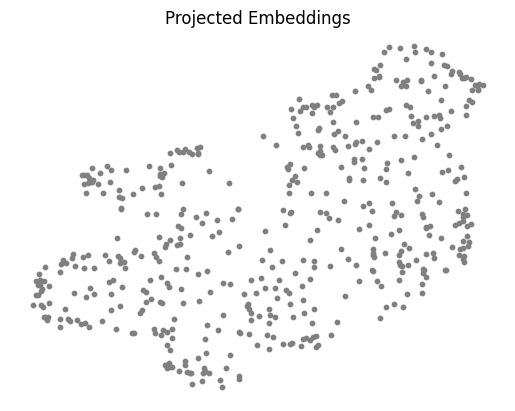

In [16]:
# Plot the two-dimensional embeddings.
import matplotlib.pyplot as plt

def plot(title='Projected Embeddings', projected_dataset_embeddings=[], projected_query_embedding=[], projected_retrieved_embeddings=[]):
    # Plot the projected query and retrieved documents in the embedding space
    plt.figure()
    plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
    if len(projected_query_embedding) > 0:
        plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
    if len(projected_retrieved_embeddings) > 0:
        plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'{title}')
    plt.axis('off')

plot(projected_dataset_embeddings=projected_dataset_embeddings)

In [18]:
# Ask the same question to the database again, but this time retrieve the embeddings in addition to the documents.
query = "What was the total revenue?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

accrued revenue share 1, 639 1, 682 ( 445 ) deferred revenue 635 774 367

for additional details, including a reconciliation of the u. s. federal statutory rate to our effective tax rate, see note 14 of the notes to consolidated financial statements included in item 8 of this annual report on form 10 - k. executive overview the following table summarizes our consolidated financial results ( in millions, except for per share information and percentages ) : year ended december 31, 2021 2022 $ change % change consolidated revenues $ 257, 637 $ 282, 836 $ 25, 199 10 % change in consolidated constant currency revenues ( 1 ) 14 % cost of revenues $ 110, 939 $ 126, 203 $ 15, 264 14 % operating expenses $ 67, 984 $ 81, 791 $ 13, 807 20 % operating income $ 78, 714 $ 74, 842 $ ( 3, 872 ) ( 5 ) % operating margin 31 % 26 % ( 5 ) % other income ( expense ), net $ 12, 020 $ ( 3, 514 ) $ ( 15, 534 ) ( 129 ) % net income $ 76, 033 $ 59, 972 $ ( 16, 061 ) ( 21 ) % diluted eps $ 5. 61 $ 4. 56 $ ( 1. 0

In [19]:
#Embed the question and answer and transform it into two dimentions.
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:00<00:00, 180.96it/s]


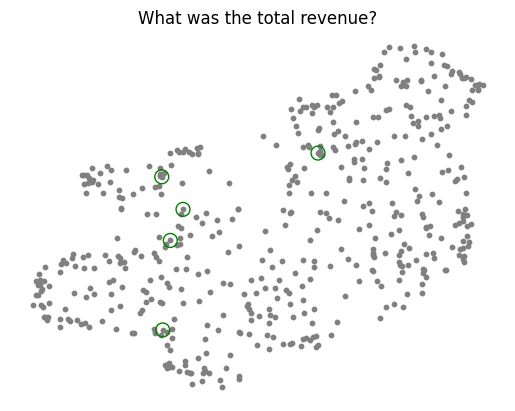

In [20]:
# Plot the projected query and retrieved documents in the embedding space.
plot(title=query, projected_dataset_embeddings=projected_dataset_embeddings, projected_query_embedding=[], projected_retrieved_embeddings=projected_retrieved_embeddings)

In [21]:
# Let's try again with a different question to see another example.
query = "What is the strategy around artificial intelligence (AI) ?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

to irrelevance over time, especially in technology, where change tends to be revolutionary, not evolutionary. people thought we were crazy when we acquired youtube and android and when we launched chrome, but those efforts have matured into major platforms for digital video and mobile devices and a safer, popular browser. we continue to look toward the future and to invest for the long term within each of our segments. as we said in the original founders ’ letter, we will not shy away from high - risk, high - reward projects that we believe in, as they are the key to our long - term success. the power of ai we believe that ai is a foundational and transformational technology that will provide compelling and helpful benefits to people and society through its capacity to assist, complement, empower, and inspire people in almost every field of human endeavor. as

are making across our businesses, such as in ai, reflect our ongoing efforts to innovate and provide products and services that

In [22]:
# Create embeddings and projections.
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:00<00:00, 141.05it/s]


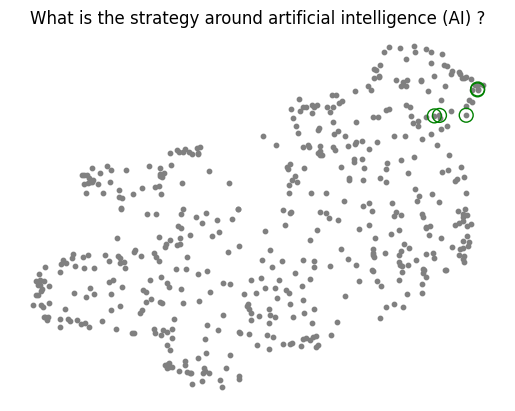

In [23]:
# Plot the projected query and retrieved documents in the embedding space. Notice how close results are, since the answer seems to be contained in the database.
plot(title=query, projected_dataset_embeddings=projected_dataset_embeddings, projected_query_embedding=[], projected_retrieved_embeddings=projected_retrieved_embeddings)

our operating results have fluctuated, and may in the future fluctuate, as a result of a number of factors, many outside of our control, including the cyclicality and seasonality in our business and geopolitical events. as a result, comparing our operating results ( including our expenses as a percentage of our revenues ) on a period - to - period basis may not be meaningful, and our past results should not be relied on as an indication of our future performance. consequently, our operating results in future quarters may fall below expectations. acquisitions, joint ventures, investments, and divestitures could result in operating difficulties, dilution, and other consequences that could harm our business, financial condition, and operating results. acquisitions, joint ventures, investments, and divestitures are important elements of our overall corporate strategy and use of capital,

customer contracts with commitments for performance obligations, including our estimate of the remainin

100%|██████████| 5/5 [00:00<00:00, 179.72it/s]


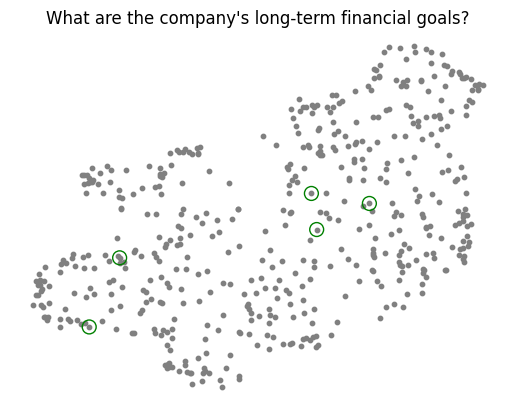

In [24]:
# Let's do all these again with another question that might be contained in the dataset to see that results are still close to one another.
query = "What are the company's long-term financial goals?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

plot(title=query, projected_dataset_embeddings=projected_dataset_embeddings, projected_query_embedding=[], projected_retrieved_embeddings=projected_retrieved_embeddings)

careers, and be happy, healthy, and productive. we offer industry - leading benefits and programs to take care of the diverse needs of our employees and their families, including opportunities for career growth and development, resources to support their financial health, and access to excellent healthcare choices. our competitive compensation programs help us to attract and retain top candidates, and we will continue to invest in recruiting talented people to technical and non - technical roles, and rewarding them well. we provide a variety of high quality training and support to managers to build and strengthen their capabilities — ranging from courses for new managers, to learning resources that help them provide feedback and manage performance, to coaching and individual support.

other bets 753 1, 068 hedging gains ( losses ) 149 1, 960 total revenues $ 257, 637 $ 282, 836

we continue to make significant research and development investments in areas of strategic focus as we seek 

100%|██████████| 5/5 [00:00<00:00, 189.81it/s]


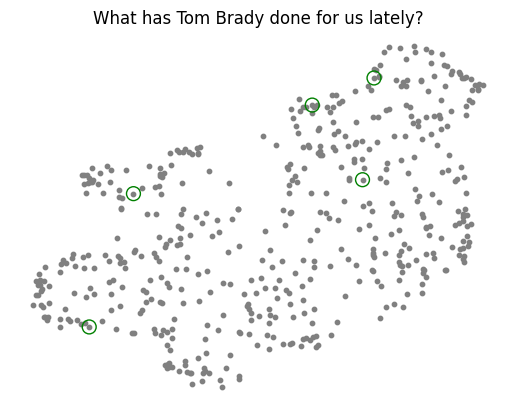

In [25]:
# Now, let's use an unrelated query and we'll observe how the results are more scattered around. Notice that the algorithm always returns close neighbors even if they are far appart. This is an indication that is returning results that are not necesseraly related to the query.
query = "What has Tom Brady done for us lately?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

plot(title=query, projected_dataset_embeddings=projected_dataset_embeddings, projected_query_embedding=[], projected_retrieved_embeddings=projected_retrieved_embeddings)

In [26]:
# Task 4. Query augmentation
# One way of improving the results from queries is by getting more results of similar queries. This can be done either by creating similar queries or by sending an answer of what you might expect, so that you attach more context. In this task, you learn to expand your queries leveraging LLMs to do the heavy lifting.

# Augment the query with a probable answer to give more context to the vector search.

def augment_query_generated(query, model):
    information = "\n\n".join(retrieved_documents)

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'Provide an example answer to the given question, that might be found in a document like an annual report.\n'
    f'Question: {query}.')
    
    responses = model.generate_content(prompt, stream=False)
    return responses.text

original_query = "Was there significant turnover in the executive team?"
hypothetical_answer = augment_query_generated(original_query, model)

joint_query = f"{original_query} {hypothetical_answer}"
print(joint_query)

Was there significant turnover in the executive team? ## Executive Team Turnover 

There was some turnover within the executive team during the fiscal year. Two executives, the Chief Operating Officer and the Chief Financial Officer, departed the company to pursue other opportunities. They were replaced by internal candidates with strong track records and deep knowledge of the company. The CEO and other key members of the executive team remain in place, providing stability and continuity in leadership.

**Note:** This is a hypothetical example. The actual content and information provided will depend on the specific company and its annual report.


In [27]:
# Perform the query with the new augmented query.
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results['documents'][0]

for doc in retrieved_documents:
    print(doc)
    print('')

summarized, and reported within the time periods specified in the sec ’ s rules and forms, and that such information is accumulated and communicated to our management, including our chief executive officer and chief financial officer, as appropriate, to allow timely decisions regarding required disclosure. changes in internal control over financial reporting there have been no changes in our internal control over financial reporting that occurred during the quarter ended december 31, 2022 that have materially affected, or are reasonably likely to materially affect, our internal control over financial reporting. management ’ s report on internal control over financial reporting

and other strategic transactions may not materialize. in connection with our divestitures, we have agreed, and may in the future agree, to provide indemnification for certain potential liabilities, which could harm our financial condition and operating results. if we were to lose the services of key personnel, w

In [28]:
# Search for embeddings for the augmented query.
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results['documents'][0]

for doc in retrieved_documents:
    print(doc)
    print('')

summarized, and reported within the time periods specified in the sec ’ s rules and forms, and that such information is accumulated and communicated to our management, including our chief executive officer and chief financial officer, as appropriate, to allow timely decisions regarding required disclosure. changes in internal control over financial reporting there have been no changes in our internal control over financial reporting that occurred during the quarter ended december 31, 2022 that have materially affected, or are reasonably likely to materially affect, our internal control over financial reporting. management ’ s report on internal control over financial reporting

and other strategic transactions may not materialize. in connection with our divestitures, we have agreed, and may in the future agree, to provide indemnification for certain potential liabilities, which could harm our financial condition and operating results. if we were to lose the services of key personnel, w

In [30]:
# Get the embeddings for the queries and results and then map them to a 2-dimensional space.
retrieved_embeddings = results['embeddings'][0]
original_query_embedding = embedding_function([original_query])
augmented_query_embedding = embedding_function([joint_query])

projected_original_query_embedding = project_embeddings(original_query_embedding, umap_transform)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:00<00:00, 125.26it/s]


(-1.4102312833070756, 8.613915792107582, 1.0237262845039368, 8.612713277339935)

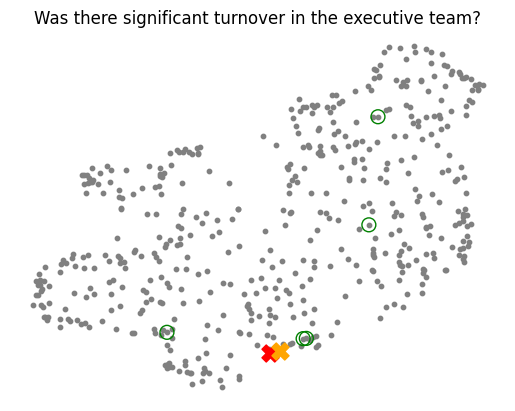

In [31]:
# Map the results to get a visual understanding of the outcome. Notice that the seleted answers are closer to the augmented query datapoint.
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')

In [32]:
# Augment the query with a additional queries.
def augment_multiple_query(query, model):
    information = "\n\n".join(retrieved_documents)

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'Your users are asking questions about an annual report.\n'
    f'Suggest up to five additional related questions to help them find the information they need, for the provided question.\n'
    f'Suggest only short questions without compound sentences. Suggest a variety of questions that cover different aspects of the topic.\n'
    f'Make sure they are complete questions, and that they are related to the original question.\n'
    f'Output one question per line. Do not number the questions.\n'
    f'Question: {query}.')
    
    responses = model.generate_content(prompt, stream=False)
    return responses.text

original_query = "What were the most important factors that contributed to increases in revenue?"
augmented_queries = augment_multiple_query(original_query, model)

joint_query = f"{original_query} \n{augmented_queries}"
print(joint_query)

What were the most important factors that contributed to increases in revenue? 
What were the specific products or services that drove the most revenue growth?
Did the company experience any changes in pricing or sales volume that contributed to the revenue increase?
Did the company expand into new markets or segments that contributed to the revenue increase?
Did the company benefit from any favorable economic or industry trends that contributed to the revenue increase?
How does the company's revenue growth compare to its competitors?


In [33]:
# Retrieve answers for all of these queries.
queries = [original_query] + augmented_queries.split('\n')
results = chroma_collection.query(query_texts=queries, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents']

# Deduplicate the retrieved documents
unique_documents = set()
for documents in retrieved_documents:
    for document in documents:
        unique_documents.add(document)

for i, documents in enumerate(retrieved_documents):
    print(f"Query: {queries[i]}")
    print('')
    print("Results:")
    for doc in documents:
        print(doc)
        print('')
    print('-'*100)

Query: What were the most important factors that contributed to increases in revenue?

Results:
. due to these factors and the evolving nature of our business, our historical revenue growth rate and historical operating margin may not be indicative of our future performance. for additional information, see trends in our business and financial effect and revenues and monetization metrics in part ii, item 7 of this annual report on form 10 - k.

our revenue growth rate could decline over time, and we anticipate downward pressure on our operating margin in the future. our revenue growth rate could decline over time as a result of a number of factors, including changes in the devices and modalities used to access our products and services ; changes in geographic mix ; deceleration or declines in advertiser spending ; competition ; customer usage and demand for our products ; decreases in our pricing of our products and services ; ongoing product and policy changes ; and shifts to lower pri

In [34]:
# Project the queries embeddings into a 2-dimensional space.
original_query_embedding = embedding_function([original_query])
augmented_query_embeddings = embedding_function(augmented_queries)

project_original_query = project_embeddings(original_query_embedding, umap_transform)
project_augmented_queries = project_embeddings(augmented_query_embeddings, umap_transform)

100%|██████████| 460/460 [00:02<00:00, 178.92it/s]


In [35]:
# Project the answer embeddings into a 2-dimensional space.
result_embeddings = results['embeddings']
result_embeddings = [item for sublist in result_embeddings for item in sublist]
projected_result_embeddings = project_embeddings(result_embeddings, umap_transform)

100%|██████████| 30/30 [00:00<00:00, 179.44it/s]


(-1.4102312833070756, 8.613915792107582, 1.0237262845039368, 8.612713277339935)

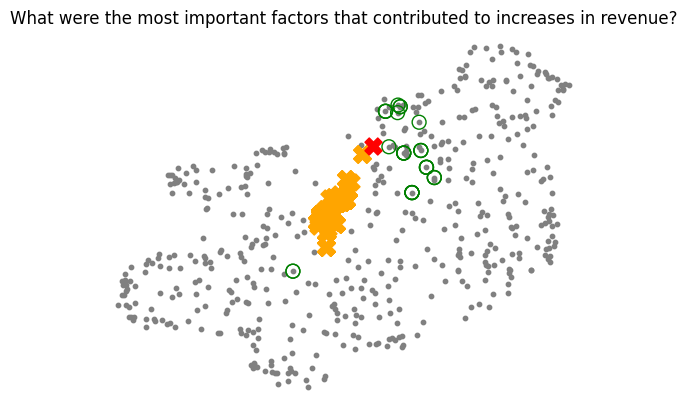

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(project_augmented_queries[:, 0], project_augmented_queries[:, 1], s=150, marker='X', color='orange')
plt.scatter(projected_result_embeddings[:, 0], projected_result_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(project_original_query[:, 0], project_original_query[:, 1], s=150, marker='X', color='r')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')

In [37]:
# Task 5. Re-ranking results
# With the query expansion technique that we just discussed, we increased the cardinality of responses. We have a new problem now. The high amount of responses might be larges than the LLM's input token limit and, it will be more expensive to process such a high amount of tokens, since we are billed per token. One solution to this problem is to rerank the results and only send the most relevant ones. Now, instead of using the same cosine-similarity method as before, you could use a cross-encoder, a method that usually yields better results.


from sentence_transformers import CrossEncoder
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [38]:
# Create unique pairs of query to document.
pairs = []
for doc in unique_documents:
    pairs.append([original_query, doc])

In [39]:
# Compute an print the similarity between the pairs.
scores = cross_encoder.predict(pairs)

print("Scores:")
for score in scores:
    print(score)

Scores:
-2.96743
-8.469064
-4.737796
1.3391347
-10.320752
0.4199409
-7.320813
-6.0731077
-5.9835205
-10.009102
-7.6591444
-2.2096562


In [40]:
# Reorder the pairs in terms of relevance.
print("New Ordering:")
ranked_docs=['']*len(scores)
i = 0
for position in np.argsort(scores)[::-1]:
    ranked_docs[position] = pairs[i][1]
    i+=1
    print(position)

New Ordering:
3
5
11
0
2
8
7
6
10
1
9
4


In [41]:
# Print the 5 most relevant documents.
ranked_docs[:5]

['our revenue growth rate could decline over time, and we anticipate downward pressure on our operating margin in the future. our revenue growth rate could decline over time as a result of a number of factors, including changes in the devices and modalities used to access our products and services ; changes in geographic mix ; deceleration or declines in advertiser spending ; competition ; customer usage and demand for our products ; decreases in our pricing of our products and services ; ongoing product and policy changes ; and shifts to lower priced products and services. in addition, we may also experience downward pressure on our operating margin resulting from a variety of factors, such as the',
 'zour employees are critical to our success and we expect to continue investing in them. our employees are among our best assets and are critical for our continued success. we expect to continue hiring talented employees around the globe and to provide competitive compensation programs. f

In [42]:
# Only send the most relevant answers to the LLM.
response = rag(query=original_query, retrieved_documents=ranked_docs[:5], model=model)
print(original_query)
print(response)


What were the most important factors that contributed to increases in revenue?
## Most Important Factors for Revenue Increase

Based on the provided information, the most important factors that contributed to Alphabet Inc.'s increased revenue in 2022 are:

**1. YouTube Non-Advertising and Hardware Growth:** Google Other revenues increased by $1 billion year-over-year, primarily driven by a rise in YouTube's non-advertising revenue and hardware sales, partially offset by a decline in Google Play income. This indicates strong demand for non-advertising features on YouTube, such as subscriptions, and increased sales of Pixel phones. 

**2. Growth in Paid YouTube Subscriptions:** The rise in YouTube non-advertising income was primarily attributable to an increase in paid subscribers. This suggests that viewers are increasingly opting for paid services offered by the platform.

**3. Strong Demand for Pixel Devices:** The expansion in hardware was primarily driven by increased sales of pixel

In [ ]:
# Task 6. Embedding Adapters
# Another improvement that we can make is instead of getting more answers and reranking, train the embedding model to work with our dataset based on user queries. This is a form a of fine tuning that you can do on your own.

# Generate queries that might be asked to a financial statement. If you had real users, you would use those queries instead of making them up.

In [43]:
def generate_queries(model):

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'You help users analyze financial statements to better understand companies.\n'
    f'Suggest 10 to 15 short questions that are important to ask when analyzing an annual report.\n'
    f'Do not output any compound questions (questions with multiple sentences or conjunctions).\n'
    f'Output each question on a separate line divided by a newline.')
    
    responses = model.generate_content(prompt, stream=False)
    return responses.text.split('\n')

generated_queries = generate_queries(model)
for query in generated_queries:
    print(query)

## Important Questions for Analyzing an Annual Report:

1. What are the company's main products or services?
2. What is the company's revenue growth rate?
3. What is the company's profit margin?
4. Is the company taking on more debt?
5. How much cash does the company have on hand?
6. What are the company's biggest competitors?
7. Has the company paid dividends in the past year?
8. What are the company's plans for the future?
9. Who are the company's key executives?
10. What are the risks and opportunities facing the company?
11. What are the company's environmental, social, and governance (ESG) initiatives?
12. How is the company using technology to improve its business?
13. Does the company have any legal or regulatory issues?
14. What is the overall tone of the annual report? 
15. Are there any red flags that need further investigation? 



In [46]:
# Search answers for those queries.
results = chroma_collection.query(query_texts=generated_queries, n_results=10, include=['documents', 'embeddings'])
retrieved_documents = results['documents']

In [47]:
# Evaluate the results in 1 for relevant and -1 for irrelevant answers.
def evaluate_results(query, statement, model):

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'You help users analyze financial statements to better understand companies.\n'
    f'For the given query, evaluate whether the following satement is relevant.\n'
    f'Output only \'yes\' or \'no\'.\n'
    f'Question: {query}, Statement: {statement}.')
    
    responses = model.generate_content(prompt, stream=False)
    if responses.text == 'yes':
        return 1
    return -1

retrieved_embeddings = results['embeddings']
query_embeddings = embedding_function(generated_queries)


In [48]:
# Extract the documents and queries into their own lists.
adapter_query_embeddings = []
adapter_doc_embeddings = []
adapter_labels = []

for q, query in enumerate(tqdm(generated_queries)):
    for d, document in enumerate(retrieved_documents[q]):
        adapter_query_embeddings.append(query_embeddings[q])
        adapter_doc_embeddings.append(retrieved_embeddings[q][d])
        adapter_labels.append(evaluate_results(query, document, model))

len(adapter_labels)

100%|██████████| 18/18 [02:10<00:00,  7.24s/it]


180

In [50]:
# Install PyTorch so that we can train the embedding model based on relevant answers.
!pip install torch

import torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [52]:
# Initialize PyTorch with the right data.
adapter_query_embeddings = torch.Tensor(np.array(adapter_query_embeddings))
adapter_doc_embeddings = torch.Tensor(np.array(adapter_doc_embeddings))
adapter_labels = torch.Tensor(np.expand_dims(np.array(adapter_labels),1))

dataset = torch.utils.data.TensorDataset(adapter_query_embeddings, adapter_doc_embeddings, adapter_labels)

In [53]:
# Set up the model with cosine similarity, so that embeddings with label 1 are similar and -1 are dissimilar.
def model(query_embedding, document_embedding, adaptor_matrix):
    updated_query_embedding = torch.matmul(adaptor_matrix, query_embedding)
    return torch.cosine_similarity(updated_query_embedding, document_embedding, dim=0)

In [54]:
# Compute the mean squared error (MSE) loss to see how close are we to the expected output.
def mse_loss(query_embedding, document_embedding, adaptor_matrix, label):
    return torch.nn.MSELoss()(model(query_embedding, document_embedding, adaptor_matrix), label)

In [55]:
# Initialize the adaptor matrix.
mat_size = len(adapter_query_embeddings[0])
adapter_matrix = torch.randn(mat_size, mat_size, requires_grad=True)

In [56]:
# Train the adaptor matrix using 100 steps by iteratively update a vector such that if I take that vector and multiply it by these inputs (query embeddings) then compare that result to this vector (this example's retrieved document vector), I get a score closer to (this example's -1 or 1 label)

min_loss = float('inf')
best_matrix = None

for epoch in tqdm(range(100)):
    for query_embedding, document_embedding, label in dataset:
        loss = mse_loss(query_embedding, document_embedding, adapter_matrix, label)

        if loss < min_loss:
            min_loss = loss
            best_matrix = adapter_matrix.clone().detach().numpy()

        loss.backward()
        with torch.no_grad():
            adapter_matrix -= 0.01 * adapter_matrix.grad
            adapter_matrix.grad.zero_()       



  0%|          | 0/100 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 100/100 [00:25<00:00,  3.88it/s]


In [58]:
# Print the loss. Notice there is almost a 30% increase in accuracy.
# Print the loss. Notice there is almost a 30% increase in accuracy.
print(f"Best loss: {min_loss.detach().numpy()}")

Best loss: 0.6690537333488464


In [59]:
# Create a scaled vector based on the best matrix that we computed.
test_vector = torch.ones((mat_size,1))
scaled_vector = np.matmul(best_matrix, test_vector).numpy()

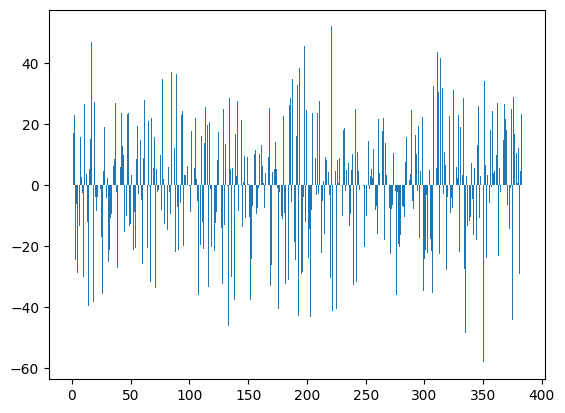

In [60]:
# Plot the scale vector answers.
import matplotlib.pyplot as plt
plt.bar(range(len(scaled_vector)), scaled_vector.flatten())
plt.show()

In [62]:
# Get the adapted query embeddings to compare them with the original values retrieved.
query_embeddings = embedding_function(generated_queries)
adapted_query_embeddings = np.matmul(best_matrix, np.array(query_embeddings).T).T

projected_query_embeddings = project_embeddings(query_embeddings, umap_transform)
projected_adapted_query_embeddings = project_embeddings(adapted_query_embeddings, umap_transform)


100%|██████████| 18/18 [00:00<00:00, 173.80it/s]


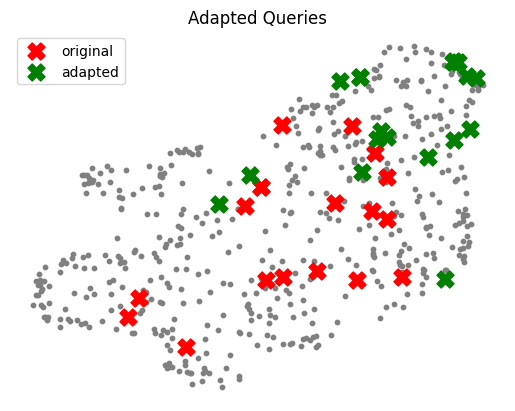

In [64]:
# Plot the adapted embeddings and the original values retrieved.
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embeddings[:, 0], projected_query_embeddings[:, 1], s=150, marker='X', color='r', label="original")
plt.scatter(projected_adapted_query_embeddings[:, 0], projected_adapted_query_embeddings[:, 1], s=150, marker='X', color='green', label="adapted")

plt.gca().set_aspect('equal', 'datalim')
plt.title("Adapted Queries")
plt.axis('off')
plt.legend()

### Authenticate your Google Cloud account

The Cloud SDK, code and other libraries currently run as the service account identity of the Workbench Instance running this notebook.

**- Authenticate the Cloud SDK with your credentials :**

In [2]:
# ! gcloud auth login

**- Authenticate code and libraries with your credentials :**

In [ ]:
# ! gcloud auth application-default

**- Service account or other**
* See how to grant Cloud Storage permissions to your service account at https://cloud.google.com/storage/docs/gsutil/commands/iam#ch-examples.

### Create a Cloud Storage bucket

Create a storage bucket to store intermediate artifacts such as datasets.

- *{Note to notebook author: For any user-provided strings that need to be unique (like bucket names or model ID's), append "-unique" to the end so proper testing can occur}*

In [ ]:
BUCKET_URI = f"gs://your-bucket-name-{PROJECT_ID}-unique"  # @param {type:"string"}

**Only if your bucket doesn't already exist**: Run the following cell to create your Cloud Storage bucket.

In [ ]:
! gsutil mb -l {REGION} -p {PROJECT_ID} {BUCKET_URI}

### Import libraries

In [ ]:
from google.cloud import aiplatform

### Initialize Vertex AI SDK for Python

Initialize the Vertex AI SDK for Python for your project.

In [ ]:
aiplatform.init(project=PROJECT_ID, location=REGION, staging_bucket=BUCKET_URI)

## Cleaning up

To clean up all Google Cloud resources used in this project, you can [delete the Google Cloud
project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects) you used for the tutorial.

Otherwise, you can delete the individual resources you created in this tutorial:

{TODO: Include commands to delete individual resources below}

In [1]:
import os

# Delete endpoint resource
# e.g. `endpoint.delete()`

# Delete model resource
# e.g. `model.delete()`

# Delete Cloud Storage objects that were created
delete_bucket = False
if delete_bucket or os.getenv("IS_TESTING"):
    ! gsutil -m rm -r $BUCKET_URI